# Thermo Properties


### Reading Polynomial parameters and Calculating Thermodynamic parameters

The thermo class given will be used to calculate the thermodynamic parameters. Also, you'll need [thermoDataNASA-9.yaml].  This file contains two arrays for each species for two separate temperature ranges: a_lo is for $200<T<1000$ K and a_hi is for $1000<T<6000$ K. We have followed Cantera nomenclature (http://www.cantera.org/docs/sphinx/html/cti/species.html#the-nasa-9-coefficient-polynomial-parameterization).


$$\frac{C^0_p(T)}{R_u}=a_0T^{−2}+a_1T^{−1}+a_2+a_3T+a_4T^2+a_5T^3+a_6T^4$$

$$\frac{H^0(T)}{R_u T}=−a_0T^{−2}+a_1 \frac{lnT}{T}+a_2+\frac{a_3}{2}T+\frac{a_4}{3}T^2+\frac{a_5}{4}T^3+\frac{a_6}{5}T^4+\frac{a_7}{T}$$

$$\frac{s^0(T)}{R_u}=−\frac{a_0}{2}T^{−2}−a_1T^{−1}+a_2 lnT+a_3T+\frac{a_4}{2}T^2+\frac{a_5}{3}T^3+\frac{a_6}{4}T^4+a_8$$

where $R_u = 8.31446 J/mol/K$ is the universal gas constant.

Note that Gordon and McBride start polynomial coefficient numbering at 1 and the last coeffients for enthalpy and entropy are named respectively $a_7 = b_1$ and $a_8 = b_2$. (http://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/20020085330_2002141071.pdf)

In [1]:
# This cell of code give you an implementation of the above formulas.
import yaml
import numpy as np

class thermo:
    
    def __init__(self, species, MW) :
        """
        species: input string name of species in thermoData.yaml
        M: input (species molecular weight, kg/kmol)
        """
        
        self.Rgas = 8.31446      # J/mol*K
        self.M    = MW
    
        with open("thermoDataNASA-9.yaml") as yfile:
           yfile = yaml.safe_load(yfile)
        
        self.a_lo = yfile[species]["a_lo"]
        self.a_hi = yfile[species]["a_hi"]
        
        self.T_lo = 200.
        self.T_mid = 1000.
        self.T_hi = 6000.
        
    def cymalalo(self) :
        return self.a_lo

    def cymalahi(self) :
        return self.a_hi

    def cp_mole(self,T) :
        """
        return calorific value at cst p in units J/kmol/K
        T: input (K)
        """
        if T<=self.T_mid and T>=self.T_lo :
            a = self.a_lo
        elif T>self.T_mid and T<=self.T_hi :
            a = self.a_hi
        else :
            print ("ERROR: temperature is out of range")

        cp = a[0]/T**2 + a[1]/T + a[2] + a[3]*T + a[4]*T**2.0 + a[5]*T**3 + a[6]*T**4
        
        return cp * self.Rgas
        
    #--------------------------------------------------------

    def cp_mass(self,T) :
        """
        return calorific value at cst P in units of J/kg/K
        T: input (K)
        """
        return self.cp_mole(T)/self.M

    #--------------------------------------------------------
    
    def h_mole(self,T) :
        """
        return enthalpy in units of J/mol
        T: input (K)
        """
        if T<=self.T_mid and T>=self.T_lo :
            a = self.a_lo
        elif T>self.T_mid and T<=self.T_hi :
            a = self.a_hi
        else :
            print ("ERROR: temperature is out of range")

        hrt = -a[0]/T**2 + a[1]*np.log(T)/T + a[2] + a[3]/2*T + a[4]/3*T**2.0 + a[5]/4*T**3 + a[6]/5*T**4 + a[7]/T
        
        return hrt * self.Rgas * T
        
    #--------------------------------------------------------

    def h_mass(self,T) :
        """
        return enthalpy in units of J/kg
        T: input (K)
        """
        return self.h_mole(T)/self.M

    #--------------------------------------------------------
        
    def s_mole(self,T) :
        """
        return entropy in units of J/mol/K
        T: input (K)
        """
        if T<=self.T_mid and T>=self.T_lo :
            a = self.a_lo
        elif T>self.T_mid and T<=self.T_hi :
            a = self.a_hi
        else :
            print ("ERROR: temperature is out of range")
        
        sr = -a[0]/2/T**2 - a[1]/T + a[2]*np.log(T) + a[3]*T + a[4]/2.0*T**2.0 + a[5]/3.0*T**3.0+ a[6]/4.0*T**4.0+ a[8]
        
        return sr * self.Rgas
        
    #--------------------------------------------------------

    def s_mass(self,T) :
        """
        return entropy in units of J/kg/K
        T: input (K)
        """
        return self.s_mole(T)/self.M

In [2]:
# Example on how to use the class thermo to calculate thermodynamics 
# quantities for a specific species.
Molecule = "C8H18"    
MW_molecule = 114               # kg/kmol

t = thermo(Molecule,MW_molecule) # thermo object;
Temperature = 2000       #K
print('Enthalpy of ',Molecule,' at ',str(Temperature), 'K: ',t.h_mole(Temperature),' J/mol')
print('Entropy of ',Molecule,' at ',str(Temperature), 'K: ',t.s_mole(Temperature),' J/mol-K')
print('Specific heat of ',Molecule,' at ',str(Temperature), 'K: ',t.cp_mole(Temperature),' J/mol')


Enthalpy of  C8H18  at  2000 K:  552095.8600782972  J/mol
Entropy of  C8H18  at  2000 K:  1171.1651410939687  J/mol-K
Specific heat of  C8H18  at  2000 K:  593.5354818172497  J/mol


In [3]:
# If you wish to use this piece of code embedded in another code, you might need the following lines:
# Careful, you might need the following function the first time you are using # the code: "!pip install ipynb"
#from ipynb.fs.full.ThermoPropertiesNASA import thermo

# Try it out in a new script, if it works, it should display the same results than the cell above
# If it works, just copy the content of the previous cell in your new script, and adapt it to your needs

In [4]:
# Temperature = 300
# HHV = -1*thermo('C8H18',114).h_mole(Temperature) - 12.5*thermo('O2',32).h_mole(Temperature) + 8*thermo('CO2',44).h_mole(Temperature) + 9*(-285820)
# print(HHV)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

phi=np.arange(0.5,1.55,0.05)
Tf = np.empty(21)

T_ref = 298.15 #K
R = 8.3144621
Cp = 3.5 * R

def h_gap_lean(phi):
    delta_h = - phi * thermo('C8H18',114).h_mole(T_ref) - 12.5 * thermo('O2',32).h_mole(T_ref) \
        + 8 * phi * thermo('CO2',44).h_mole(T_ref) + 9 * phi * thermo('H2O',18).h_mole(T_ref) \
        + (12.5 - 12.5 * phi) * thermo('O2',32).h_mole(T_ref) 
        
    return delta_h

def h_gap_rich(phi):
    delta_h = - phi * thermo('C8H18',114).h_mole(T_ref) - 12.5 * thermo('O2',32).h_mole(T_ref) \
    + 0.8 * phi * thermo('CO',28).h_mole(T_ref) \
    + 7.2 * phi * thermo('CO2',44).h_mole(T_ref) \
    + (25-15.2*phi) * thermo('H2O',18).h_mole(T_ref) \
    + (24.2 * phi - 25) * thermo('H2',2).h_mole(T_ref) 
    
    return delta_h


def calculate_Tf():
    for a in range (len(phi)):
        if phi[a] == 1 or phi[a] < 1:
            Tf[a] = (- h_gap_lean(phi[a])) /(Cp*(4.5*phi[a] + 47 + 12.5)) + T_ref
        else:
            Tf[a] = (- h_gap_rich(phi[a])) / (Cp*( - 15.2 * phi[a] + 8*phi[a] + 24.2*phi[a] + 47)) + T_ref

calculate_Tf()
print(Tf)

[1717.34254487 1853.59418895 1988.86008963 2123.15090572 2256.47714292
 2388.84915656 2520.27715425 2650.77119855 2780.34120948 2908.99696711
 3019.07299212 2957.49607732 2897.5124769  2839.06113976 2782.0840945
 2726.52625769 2672.33525624 2619.46126268 2567.85684241 2517.47681174
 2468.27810592]


In [6]:
#from P2Q3 import phi #h_gap_rich, R #h_gap_lean, R
from scipy.integrate import quad 
from scipy.optimize import fsolve as solve
import numpy as np

Tf_int = np.empty(21)

def Cp_lean(Tad):
    return 8 * phi[a] * thermo('CO2',44).cp_mole(Tad) + 9 * phi[a] * thermo('H2O',18).cp_mole(Tad) \
        + (12.5 - 12.5 * phi[a]) * thermo('O2',32).cp_mole(Tad) + 47 * thermo('N2',28).cp_mole(Tad)

def h_int_lean(Tad):
    #print(quad(Cp_lean(Tad), T_ref, Tad)[0])
    return quad(Cp_lean, T_ref, Tad)[0]

def h_gap_lean():
    x = 0.0
    x = phi[a]
    delta_h = - x * thermo('C8H18',114).h_mole(T_ref) - 12.5 * thermo('O2',32).h_mole(T_ref) \
        + 8 * x * thermo('CO2',44).h_mole(T_ref) + 9 * x * thermo('H2O',18).h_mole(T_ref) \
        + (12.5 - 12.5 * x) * thermo('O2',32).h_mole(T_ref) 
    return delta_h

def lean_gap(Tad):
    return h_gap_lean() + h_int_lean(Tad)


def Cp_rich(Tad):
    Cp = 0.8 * phi[a] * thermo('CO',28).cp_mole(Tad) \
    + 7.2 * phi[a] * thermo('CO2',44).cp_mole(Tad) \
    + (25-15.2*phi[a]) * thermo('H2O',18).cp_mole(Tad) \
    + (24.2 * phi[a] - 25) * thermo('H2',2).cp_mole(Tad) + 47 * thermo('N2',28).cp_mole(Tad)

    return Cp

def h_int_rich(Tad):
    return quad(Cp_rich, T_ref, Tad)[0]

def h_gap_rich():
    delta_h = - phi[a] * thermo('C8H18',114).h_mole(T_ref) - 12.5 * thermo('O2',32).h_mole(T_ref) \
    + 0.8 * phi[a] * thermo('CO',28).h_mole(T_ref) \
    + 7.2 * phi[a] * thermo('CO2',44).h_mole(T_ref) \
    + (25-15.2*phi[a]) * thermo('H2O',18).h_mole(T_ref) \
    + (24.2 * phi[a] - 25) * thermo('H2',2).h_mole(T_ref) 
    return delta_h

def rich_gap(Tad):
    return h_gap_rich() + h_int_rich(Tad)

    

for a in range(len(phi)):
    if phi[a] == 1 or phi[a] < 1:
        Tf_int[a] = solve(lean_gap, 1000)
        print(Tf_int[a])
    else:
        Tf_int[a] = solve(rich_gap, 1000)
        print(Tf_int[a])
print(Tf_int)

1511.9443032754539
1611.5035784888616
1708.3563540592709
1802.670530666106
1894.5894745278595
1984.241931001151
2071.742542028344
2157.194799013271
2240.6928498363654
2322.3228664497105
2395.009731279294
2357.1678043906036
2319.9621680794917
2283.3806677386915
2247.402899066237
2212.0149898914274
2177.2021360493377
2142.950093509738
2109.2451054214016
2076.0739264172694
2043.4237371736092
[1511.94430328 1611.50357849 1708.35635406 1802.67053067 1894.58947453
 1984.241931   2071.74254203 2157.19479901 2240.69284984 2322.32286645
 2395.00973128 2357.16780439 2319.96216808 2283.38066774 2247.40289907
 2212.01498989 2177.20213605 2142.95009351 2109.24510542 2076.07392642
 2043.42373717]


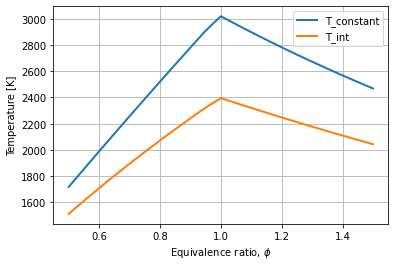

In [7]:
plt.plot(phi, Tf, label="T_constant", lw=2)
plt.plot(phi, Tf_int, label="T_int", lw=2)
plt.xlabel(r"Equivalence ratio, $\phi$")
plt.ylabel("Temperature [K]");
plt.legend()
plt.grid(True)
plt.show()

# PART 3 starts

/tmp/ipykernel_41227/3643486836.py:22: DeprecationWarning: XML_Node::build: 
The CTI and XML input file formats are deprecated and will be removed in
Cantera 3.0. Use 'cti2yaml.py' or 'ctml2yaml.py' to convert CTI or XML input
files to the YAML format. See https://cantera.org/tutorials/legacy2yaml.html
for more information.
  gas = ct.Solution('Jerzembeck.cti')


At phi =          0.5, Tad =         1511
At phi =         0.55, Tad =         1610
At phi =          0.6, Tad =         1705
At phi =         0.65, Tad =         1797
At phi =          0.7, Tad =         1885
At phi =         0.75, Tad =         1970
At phi =          0.8, Tad =         2049
At phi =         0.85, Tad =         2123
At phi =          0.9, Tad =         2187
At phi =         0.95, Tad =         2239
At phi =            1, Tad =         2274
At phi =         1.05, Tad =         2286
At phi =          1.1, Tad =         2274
At phi =         1.15, Tad =         2246
At phi =          1.2, Tad =         2210
At phi =         1.25, Tad =         2172
At phi =          1.3, Tad =         2133
At phi =         1.35, Tad =         2094
At phi =          1.4, Tad =         2055
At phi =         1.45, Tad =         2017
At phi =          1.5, Tad =         1979
At phi =         1.55, Tad =         1942
At phi =          1.6, Tad =         1905
At phi =         1.65, Tad =      

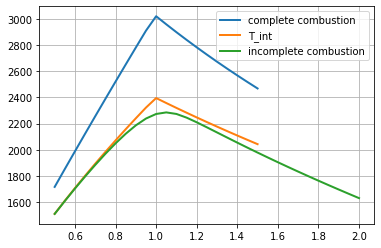

In [8]:
"""
Adiabatic flame temperature and equilibrium composition for a fuel/air mixture
as a function of equivalence ratio, including formation of solid carbon.

Requires: cantera >= 2.5.0, matplotlib >= 2.0
Keywords: equilibrium, combustion, multiphase
"""

import cantera as ct
import numpy as np
import sys
import csv

##############################################################################
# Edit these parameters to change the initial temperature, the pressure, and
# the phases in the mixture.

T = 300.0
P = 101325.0

# phases
gas = ct.Solution('Jerzembeck.cti')
carbon = ct.Solution('Jerzembeck.cti')

# the phases that will be included in the calculation, and their initial moles
mix_phases = [(gas, 1.0), (carbon, 0.0)]

# gaseous fuel species
fuel_species = 'IXC8H18'

# equivalence ratio range

phi2 = np.arange(0.5, 2.05, 0.05)

npoints = len(phi2)



##############################################################################

mix = ct.Mixture(mix_phases)

# create some arrays to hold the data
tad = np.zeros(phi2.shape)
xeq = np.zeros((mix.n_species, npoints))

for i in range(npoints):
    # set the gas state
    gas.set_equivalence_ratio(phi2[i], fuel_species, 'O2:1.0, N2:3.76')

    # create a mixture of 1 mole of gas, and 0 moles of solid carbon.
    mix = ct.Mixture(mix_phases)
    mix.T = T
    mix.P = P

    # equilibrate the mixture adiabatically at constant P
    mix.equilibrate('HP', solver='gibbs', max_steps=1000)

    tad[i] = mix.T
    print('At phi = {0:12.4g}, Tad = {1:12.4g}'.format(phi2[i], tad[i]))
    xeq[:, i] = mix.species_moles

# write output CSV file for importing into Excel
csv_file = 'adiabatic_Octane.csv'
with open(csv_file, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['phi', 'T (K)'] + mix.species_names)
    for i in range(npoints):
        writer.writerow([phi2[i], tad[i]] + list(xeq[:, i]))
print('Output written to {0}'.format(csv_file))

if True:
    import matplotlib.pyplot as plt
    plt.plot(phi, Tf, label="complete combustion", lw=2)
    plt.plot(phi, Tf_int, label="T_int", lw=2)
    plt.plot(phi2, tad, label="incomplete combustion", lw=2)
    plt.grid(True)
    plt.legend()
    # plt.xlabel(r"Equivalence ratio, $\phi$")
    # plt.ylabel("Temperature [K]");
    # plt.plot(phi, tad)
    # plt.xlabel('Equivalence ratio')
    # plt.ylabel('Adiabatic flame temperature [K]')
    plt.show()

At phi =          0.5, Tad =         1643
At phi =         0.55, Tad =         1744
At phi =          0.6, Tad =         1839
At phi =         0.65, Tad =         1930
At phi =          0.7, Tad =         2016
At phi =         0.75, Tad =         2096
At phi =          0.8, Tad =         2171
At phi =         0.85, Tad =         2239
At phi =          0.9, Tad =         2300
At phi =         0.95, Tad =         2350
At phi =            1, Tad =         2385
At phi =         1.05, Tad =         2400
At phi =          1.1, Tad =         2398
At phi =         1.15, Tad =         2386
At phi =          1.2, Tad =         2369
At phi =         1.25, Tad =         2350
At phi =          1.3, Tad =         2330
At phi =         1.35, Tad =         2310
At phi =          1.4, Tad =         2289
At phi =         1.45, Tad =         2269
At phi =          1.5, Tad =         2249
At phi =         1.55, Tad =         2229
At phi =          1.6, Tad =         2209
At phi =         1.65, Tad =      

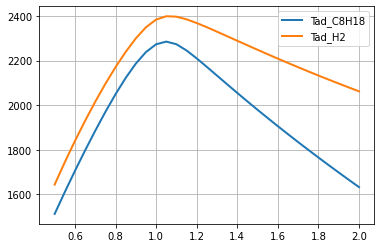

In [9]:
"""
Adiabatic flame temperature and equilibrium composition for a fuel/air mixture
as a function of equivalence ratio, including formation of solid carbon.

Requires: cantera >= 2.5.0, matplotlib >= 2.0
Keywords: equilibrium, combustion, multiphase
"""

import cantera as ct
import numpy as np
import sys
import csv

##############################################################################
# Edit these parameters to change the initial temperature, the pressure, and
# the phases in the mixture.

T = 300.0
P = 101325.0

# phases
gas = ct.Solution('Jerzembeck.cti')
carbon = ct.Solution('Jerzembeck.cti')

# the phases that will be included in the calculation, and their initial moles
mix_phases = [(gas, 1.0), (carbon, 0.0)]

# gaseous fuel species
fuel_species = 'H2'

# equivalence ratio range

phi2 = np.arange(0.5, 2.05, 0.05)

npoints = len(phi2)



##############################################################################

mix = ct.Mixture(mix_phases)

# create some arrays to hold the data
tad2 = np.zeros(phi2.shape)
xeq = np.zeros((mix.n_species, npoints))

for i in range(npoints):
    # set the gas state
    gas.set_equivalence_ratio(phi2[i], fuel_species, 'O2:1.0, N2:3.76')

    # create a mixture of 1 mole of gas, and 0 moles of solid carbon.
    mix = ct.Mixture(mix_phases)
    mix.T = T
    mix.P = P

    # equilibrate the mixture adiabatically at constant P
    mix.equilibrate('HP', solver='gibbs', max_steps=1000)

    tad2[i] = mix.T
    print('At phi = {0:12.4g}, Tad = {1:12.4g}'.format(phi2[i], tad2[i]))
    xeq[:, i] = mix.species_moles

# write output CSV file for importing into Excel
csv_file = 'adiabatic.csv'
with open(csv_file, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['phi', 'T (K)'] + mix.species_names)
    for i in range(npoints):
        writer.writerow([phi2[i], tad2[i]] + list(xeq[:, i]))
print('Output written to {0}'.format(csv_file))

if True:
    import matplotlib.pyplot as plt
    # plt.plot(phi, Tf, label="complete combustion", lw=2)
    plt.plot(phi2, tad, label="Tad_C8H18", lw=2)
    plt.plot(phi2, tad2, label="Tad_H2", lw=2)
    plt.grid(True)
    plt.legend()
    # plt.xlabel(r"Equivalence ratio, $\phi$")
    # plt.ylabel("Temperature [K]");
    # plt.plot(phi, tad)
    # plt.xlabel('Equivalence ratio')
    # plt.ylabel('Adiabatic flame temperature [K]')
    plt.show()

# Part 4 start

At phi =          0.5, Tad =         1511
At phi =         0.55, Tad =         1610
At phi =          0.6, Tad =         1705
At phi =         0.65, Tad =         1797
At phi =          0.7, Tad =         1885
At phi =         0.75, Tad =         1970
At phi =          0.8, Tad =         2049
At phi =         0.85, Tad =         2123
At phi =          0.9, Tad =         2187
At phi =         0.95, Tad =         2239
At phi =            1, Tad =         2274
At phi =         1.05, Tad =         2286
At phi =          1.1, Tad =         2274
At phi =         1.15, Tad =         2246
At phi =          1.2, Tad =         2210
At phi =         1.25, Tad =         2172
At phi =          1.3, Tad =         2133
At phi =         1.35, Tad =         2094
At phi =          1.4, Tad =         2055
At phi =         1.45, Tad =         2017
At phi =          1.5, Tad =         1979
At phi =         1.55, Tad =         1942
At phi =          1.6, Tad =         1905
At phi =         1.65, Tad =      

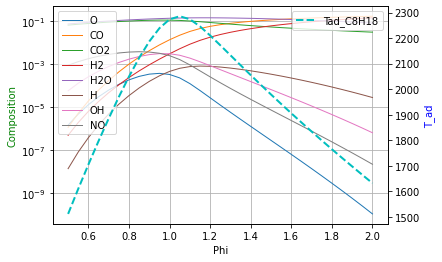

In [11]:
import cantera as ct
import numpy as np
import sys
import csv

##############################################################################
# Edit these parameters to change the initial temperature, the pressure, and
# the phases in the mixture.

T = 300.0
P = 101325.0

species = ['O','CO','CO2','H2','H2O','H','OH','NO']
list =[[],[],[],[],[],[],[],[]]
# phases
gas = ct.Solution('Jerzembeck.cti')
carbon = ct.Solution('Jerzembeck.cti')

# the phases that will be included in the calculation, and their initial moles
mix_phases = [(gas, 1.0), (carbon, 0.0)]

# gaseous fuel species
fuel_species = 'IXC8H18'

# equivalence ratio range

phi2 = np.arange(0.5, 2.05, 0.05)

npoints = len(phi2)



##############################################################################

mix = ct.Mixture(mix_phases)

# create some arrays to hold the data
tad = np.zeros(phi2.shape)
xeq = np.zeros((mix.n_species, npoints))

for i in range(npoints):
    # set the gas state
    gas.set_equivalence_ratio(phi2[i], fuel_species, 'O2:1.0, N2:3.76')

    # create a mixture of 1 mole of gas, and 0 moles of solid carbon.
    mix = ct.Mixture(mix_phases)
    mix.T = T
    mix.P = P

    # equilibrate the mixture adiabatically at constant P
    mix.equilibrate('HP', solver='gibbs', max_steps=1000)

    tad[i] = mix.T
    print('At phi = {0:12.4g}, Tad = {1:12.4g}'.format(phi2[i], tad[i]))
    xeq[:, i] = mix.species_moles
    
    for j in range(len(species)):
         list[j].append(gas.X[gas.species_index(species[j])]);
            
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

for j in range(len(species)):
    ax1.plot(phi2, list[j], label=species[j], lw=1)

ax2.plot(phi2, tad,'--', label="Tad_C8H18", lw=2, color ='c')
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend()


ax1.set_xlabel('Phi')
ax1.set_ylabel('Composition', color='g')
ax1.set_yscale('log')
ax2.set_ylabel('T_ad', color='b')

plt.show()
    

At P =    1.013e+05, Tad =         2274
At P =     6.08e+05, Tad =         2316
At P =    1.115e+06, Tad =         2328
At P =    1.621e+06, Tad =         2335
At P =    2.128e+06, Tad =         2339
At P =    2.634e+06, Tad =         2343
At P =    3.141e+06, Tad =         2345
At P =    3.648e+06, Tad =         2347


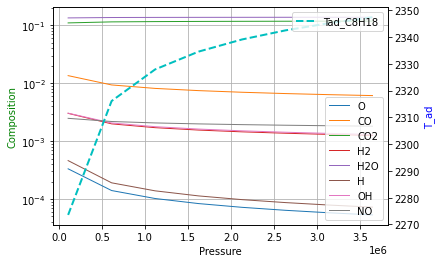

In [12]:
import cantera as ct
import numpy as np
import sys
import csv

##############################################################################
# Edit these parameters to change the initial temperature, the pressure, and
# the phases in the mixture.

T = 300.0
P_scale = np.arange(1, 37, 5)
P = 101325.0 * P_scale

species = ['O','CO','CO2','H2','H2O','H','OH','NO']
list =[[],[],[],[],[],[],[],[]]

# phases
gas = ct.Solution('Jerzembeck.cti')
carbon = ct.Solution('Jerzembeck.cti')

# the phases that will be included in the calculation, and their initial moles
mix_phases = [(gas, 1.0), (carbon, 0.0)]

# gaseous fuel species
fuel_species = 'IXC8H18'

# equivalence ratio range

phi3 = 1

npoints = len(P_scale)



##############################################################################

mix = ct.Mixture(mix_phases)

# create some arrays to hold the data
tad = np.zeros(P.shape)
xeq = np.zeros((mix.n_species, npoints))

for i in range(npoints):
    # set the gas state
    gas.set_equivalence_ratio(phi3, fuel_species, 'O2:1.0, N2:3.76')

    # create a mixture of 1 mole of gas, and 0 moles of solid carbon.
    mix = ct.Mixture(mix_phases)
    mix.T = T
    mix.P = P[i]

    # equilibrate the mixture adiabatically at constant P
    mix.equilibrate('HP', solver='gibbs', max_steps=1000)

    tad[i] = mix.T
    print('At P = {0:12.4g}, Tad = {1:12.4g}'.format(P[i], tad[i]))
    xeq[:, i] = mix.species_moles
    
    for j in range(len(species)):
         list[j].append(gas.X[gas.species_index(species[j])]);
            
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

for j in range(len(species)):
    ax1.plot(P, list[j], label=species[j], lw=1)

ax2.plot(P, tad,'--', label="Tad_C8H18", lw=2, color ='c')
ax1.grid(True)
ax1.legend(loc='lower right')
ax2.legend(loc='upper right')


ax1.set_xlabel('Pressure')
ax1.set_ylabel('Composition', color='g')
ax1.set_yscale('log')
ax2.set_ylabel('T_ad', color='b')

plt.show()

At T =          300, Tad =         2274
At T =          400, Tad =         2319
At T =          500, Tad =         2365
At T =          600, Tad =         2409
At T =          700, Tad =         2452
At T =          800, Tad =         2495
At T =          900, Tad =         2536


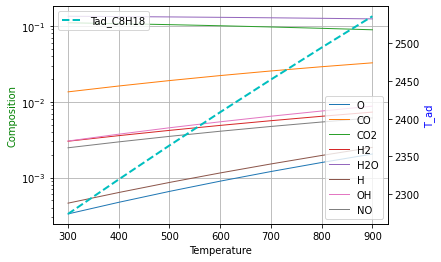

In [13]:
import cantera as ct
import numpy as np
import sys
import csv

##############################################################################
# Edit these parameters to change the initial temperature, the pressure, and
# the phases in the mixture.

T = np.arange(300, 950, 100)

P = 101325.0 

species = ['O','CO','CO2','H2','H2O','H','OH','NO']
list =[[],[],[],[],[],[],[],[]]

# phases
gas = ct.Solution('Jerzembeck.cti')
carbon = ct.Solution('Jerzembeck.cti')

# the phases that will be included in the calculation, and their initial moles
mix_phases = [(gas, 1.0), (carbon, 0.0)]

# gaseous fuel species
fuel_species = 'IXC8H18'

# equivalence ratio range

phi2 = 1

npoints = len(T)



##############################################################################

mix = ct.Mixture(mix_phases)

# create some arrays to hold the data
tad = np.zeros(T.shape)
xeq = np.zeros((mix.n_species, npoints))

for i in range(npoints):
    # set the gas state
    gas.set_equivalence_ratio(phi2, fuel_species, 'O2:1.0, N2:3.76')

    # create a mixture of 1 mole of gas, and 0 moles of solid carbon.
    mix = ct.Mixture(mix_phases)
    mix.T = T[i]
    mix.P = P

    # equilibrate the mixture adiabatically at constant P
    mix.equilibrate('HP', solver='gibbs', max_steps=1000)

    tad[i] = mix.T
    print('At T = {0:12.4g}, Tad = {1:12.4g}'.format(T[i], tad[i]))
    xeq[:, i] = mix.species_moles
    
    for j in range(len(species)):
         list[j].append(gas.X[gas.species_index(species[j])]);
            
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

for j in range(len(species)):
    ax1.plot(T, list[j], label=species[j], lw=1)

ax2.plot(T, tad,'--', label="Tad_C8H18", lw=2, color ='c')
ax1.grid(True)
ax1.legend(loc='lower right')
ax2.legend()


ax1.set_xlabel('Temperature')
ax1.set_ylabel('Composition', color='g')
ax1.set_yscale('log')
ax2.set_ylabel('T_ad', color='b')

plt.show()

# Part 5

At Fraction =            0, Tad =         2549
At Fraction =         0.05, Tad =         2450
At Fraction =          0.1, Tad =         2353
At Fraction =         0.15, Tad =         2256
At Fraction =          0.2, Tad =         2160
At Fraction =         0.25, Tad =         2064
At Fraction =          0.3, Tad =         1968
At Fraction =         0.35, Tad =         1873
At Fraction =          0.4, Tad =         1779
At Fraction =         0.45, Tad =         1688
At Fraction =          0.5, Tad =         1598
At Fraction =         0.55, Tad =         1511
At Fraction =          0.6, Tad =         1425
At Fraction =         0.65, Tad =         1342
At Fraction =          0.7, Tad =         1260
At Fraction =         0.75, Tad =         1180
At Fraction =          0.8, Tad =         1101
At Fraction =         0.85, Tad =         1024
At Fraction =          0.9, Tad =        948.7
At Fraction =         0.95, Tad =          874


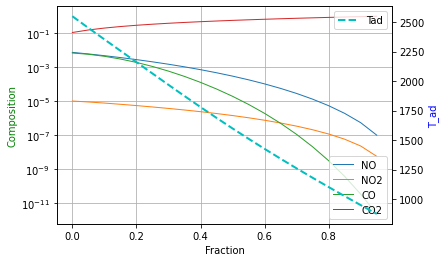

In [24]:
import cantera as ct
import numpy as np
import sys
import csv

##############################################################################
# Edit these parameters to change the initial temperature, the pressure, and
# the phases in the mixture.

T = 800

P = 30*101325.0 

species = ['NO','NO2','CO','CO2']
list =[[],[],[],[]]

# phases
gas = ct.Solution('Jerzembeck.cti')
carbon = ct.Solution('Jerzembeck.cti')

# the phases that will be included in the calculation, and their initial moles
mix_phases = [(gas, 1.0), (carbon, 0.0)]

# gaseous fuel species
fuel_species = 'IXC8H18'

# equivalence ratio range

phi5 = 0.9



fraction = np.arange(0,0.96,0.05)
npoints = len(fraction)

##############################################################################

mix = ct.Mixture(mix_phases)

# create some arrays to hold the data
tad = np.zeros(fraction.shape)
xeq = np.zeros((mix.n_species, npoints))

for i in range(npoints):
    # set the gas state
    gas.set_equivalence_ratio(phi5, fuel_species, 'O2:1.0, N2:3.76', diluent="CO2", fraction={"diluent":(fraction[i])})

    # create a mixture of 1 mole of gas, and 0 moles of solid carbon.
    mix = ct.Mixture(mix_phases)
    mix.T = T
    mix.P = P

    # equilibrate the mixture adiabatically at constant P
    mix.equilibrate('HP', solver='auto', max_steps=1000)

    tad[i] = mix.T
    print('At Fraction = {0:12.4g}, Tad = {1:12.4g}'.format(fraction[i], tad[i]))
    xeq[:, i] = mix.species_moles
    

    
# csv_file = 'dilution_CO2.csv'
# with open(csv_file, 'w', newline='') as outfile:
#     writer = csv.writer(outfile)
#     writer.writerow(['Mole Fraction of CO2', 'T (K)'] + mix.species_names)
#     for i in range(npoints):
#         writer.writerow([fraction[i], tad[i]] + list(xeq[:, i]))
# print('Output written to {0}'.format(csv_file))
    for j in range(len(species)):
         list[j].append(gas.X[gas.species_index(species[j])]);
            
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

for j in range(len(species)):
    ax1.plot(fraction, list[j], label=species[j], lw=1)

ax2.plot(fraction, tad,'--', label="Tad", lw=2, color ='c')
ax1.grid(True)
ax1.legend(loc='lower right')
ax2.legend()


ax1.set_xlabel('Fraction')
ax1.set_ylabel('Composition', color='g')
ax1.set_yscale('log')
ax2.set_ylabel('T_ad', color='b')

plt.show()

At Fraction =            0, Tad =          785
At Fraction =         0.05, Tad =         3601
At Fraction =          0.1, Tad =         3542
At Fraction =         0.15, Tad =         3481
At Fraction =          0.2, Tad =         3416
At Fraction =         0.25, Tad =         3349
At Fraction =          0.3, Tad =         3278
At Fraction =         0.35, Tad =         3203
At Fraction =          0.4, Tad =         3123
At Fraction =         0.45, Tad =         3037
At Fraction =          0.5, Tad =         2943
At Fraction =         0.55, Tad =         2838
At Fraction =          0.6, Tad =         2720
At Fraction =         0.65, Tad =         2583
At Fraction =          0.7, Tad =         2419
At Fraction =         0.75, Tad =         2217
At Fraction =          0.8, Tad =         1975
At Fraction =         0.85, Tad =         1704
At Fraction =          0.9, Tad =         1418
At Fraction =         0.95, Tad =         1118


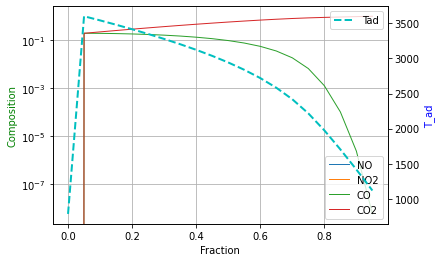

In [29]:
#No N2
import cantera as ct
import numpy as np
import sys
import csv

##############################################################################
# Edit these parameters to change the initial temperature, the pressure, and
# the phases in the mixture.

T = 800

P = 30*101325.0 

species = ['NO','NO2','CO','CO2']
list =[[],[],[],[]]

# phases
gas = ct.Solution('Jerzembeck.cti')
carbon = ct.Solution('Jerzembeck.cti')

# the phases that will be included in the calculation, and their initial moles
mix_phases = [(gas, 1.0), (carbon, 0.0)]

# gaseous fuel species
fuel_species = 'IXC8H18'

# equivalence ratio range

phi5 = 0.9



fraction = np.arange(0,0.96,0.05)
npoints = len(fraction)

##############################################################################

mix = ct.Mixture(mix_phases)

# create some arrays to hold the data
tad = np.zeros(fraction.shape)
xeq = np.zeros((mix.n_species, npoints))

for i in range(npoints):
    # set the gas state
    gas.set_equivalence_ratio(phi5, fuel_species, 'O2:1.0', diluent="CO2", fraction={"diluent":(fraction[i])})

    # create a mixture of 1 mole of gas, and 0 moles of solid carbon.
    mix = ct.Mixture(mix_phases)
    mix.T = T
    mix.P = P

    # equilibrate the mixture adiabatically at constant P
    mix.equilibrate('HP', solver='auto', max_steps=1000)

    tad[i] = mix.T
    print('At Fraction = {0:12.4g}, Tad = {1:12.4g}'.format(fraction[i], tad[i]))
    xeq[:, i] = mix.species_moles
    

    
# csv_file = 'dilution_CO2.csv'
# with open(csv_file, 'w', newline='') as outfile:
#     writer = csv.writer(outfile)
#     writer.writerow(['Mole Fraction of CO2', 'T (K)'] + mix.species_names)
#     for i in range(npoints):
#         writer.writerow([fraction[i], tad[i]] + list(xeq[:, i]))
# print('Output written to {0}'.format(csv_file))
    for j in range(len(species)):
         list[j].append(gas.X[gas.species_index(species[j])]);
            
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

for j in range(len(species)):
    ax1.plot(fraction, list[j], label=species[j], lw=1)

ax2.plot(fraction, tad,'--', label="Tad", lw=2, color ='c')
ax1.grid(True)
ax1.legend(loc='lower right')
ax2.legend()


ax1.set_xlabel('Fraction')
ax1.set_ylabel('Composition', color='g')
ax1.set_yscale('log')
ax2.set_ylabel('T_ad', color='b')

plt.show()

At Fraction =            0, Tad =         2549
At Fraction =         0.05, Tad =         2471
At Fraction =          0.1, Tad =         2391
At Fraction =         0.15, Tad =         2309
At Fraction =          0.2, Tad =         2226
At Fraction =         0.25, Tad =         2140
At Fraction =          0.3, Tad =         2054
At Fraction =         0.35, Tad =         1967
At Fraction =          0.4, Tad =         1880
At Fraction =         0.45, Tad =         1793
At Fraction =          0.5, Tad =         1706
At Fraction =         0.55, Tad =         1618
At Fraction =          0.6, Tad =         1531
At Fraction =         0.65, Tad =         1443
At Fraction =          0.7, Tad =         1354
At Fraction =         0.75, Tad =         1266
At Fraction =          0.8, Tad =         1176
At Fraction =         0.85, Tad =         1085
At Fraction =          0.9, Tad =        992.1
At Fraction =         0.95, Tad =        897.3


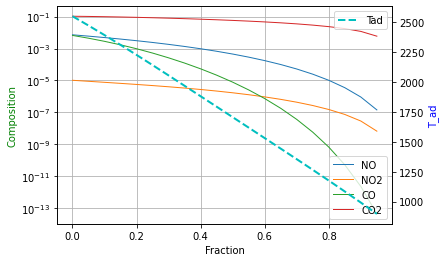

In [26]:
import cantera as ct
import numpy as np
import sys
import csv

##############################################################################
# Edit these parameters to change the initial temperature, the pressure, and
# the phases in the mixture.

T = 800

P = 30*101325.0 

species = ['NO','NO2','CO','CO2']
list =[[],[],[],[]]

# phases
gas = ct.Solution('Jerzembeck.cti')
carbon = ct.Solution('Jerzembeck.cti')

# the phases that will be included in the calculation, and their initial moles
mix_phases = [(gas, 1.0), (carbon, 0.0)]

# gaseous fuel species
fuel_species = 'IXC8H18'

# equivalence ratio range

phi5 = 0.9



fraction = np.arange(0,0.96,0.05)
npoints = len(fraction)

##############################################################################

mix = ct.Mixture(mix_phases)

# create some arrays to hold the data
tad = np.zeros(fraction.shape)
xeq = np.zeros((mix.n_species, npoints))

for i in range(npoints):
    # set the gas state
    gas.set_equivalence_ratio(phi5, fuel_species, 'O2:1.0, N2:3.76', diluent="H2O", fraction={"diluent":(fraction[i])})

    # create a mixture of 1 mole of gas, and 0 moles of solid carbon.
    mix = ct.Mixture(mix_phases)
    mix.T = T
    mix.P = P

    # equilibrate the mixture adiabatically at constant P
    mix.equilibrate('HP', solver='auto', max_steps=1000)

    tad[i] = mix.T
    print('At Fraction = {0:12.4g}, Tad = {1:12.4g}'.format(fraction[i], tad[i]))
    xeq[:, i] = mix.species_moles
    

    
# csv_file = 'dilution_CO2.csv'
# with open(csv_file, 'w', newline='') as outfile:
#     writer = csv.writer(outfile)
#     writer.writerow(['Mole Fraction of CO2', 'T (K)'] + mix.species_names)
#     for i in range(npoints):
#         writer.writerow([fraction[i], tad[i]] + list(xeq[:, i]))
# print('Output written to {0}'.format(csv_file))
    for j in range(len(species)):
         list[j].append(gas.X[gas.species_index(species[j])]);
            
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

for j in range(len(species)):
    ax1.plot(fraction, list[j], label=species[j], lw=1)

ax2.plot(fraction, tad,'--', label="Tad", lw=2, color ='c')
ax1.grid(True)
ax1.legend(loc='lower right')
ax2.legend()


ax1.set_xlabel('Fraction')
ax1.set_ylabel('Composition', color='g')
ax1.set_yscale('log')
ax2.set_ylabel('T_ad', color='b')

plt.show()

At Fraction =            0, Tad =         2549
At Fraction =         0.05, Tad =         2516
At Fraction =          0.1, Tad =         2479
At Fraction =         0.15, Tad =         2440
At Fraction =          0.2, Tad =         2397
At Fraction =         0.25, Tad =         2349
At Fraction =          0.3, Tad =         2298
At Fraction =         0.35, Tad =         2241
At Fraction =          0.4, Tad =         2179
At Fraction =         0.45, Tad =         2110
At Fraction =          0.5, Tad =         2036
At Fraction =         0.55, Tad =         1954
At Fraction =          0.6, Tad =         1866
At Fraction =         0.65, Tad =         1769
At Fraction =          0.7, Tad =         1663
At Fraction =         0.75, Tad =         1549
At Fraction =          0.8, Tad =         1424
At Fraction =         0.85, Tad =         1287
At Fraction =          0.9, Tad =         1138
At Fraction =         0.95, Tad =        976.1


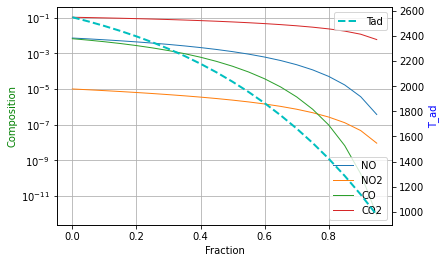

In [28]:
import cantera as ct
import numpy as np
import sys
import csv

##############################################################################
# Edit these parameters to change the initial temperature, the pressure, and
# the phases in the mixture.

T = 800

P = 30*101325.0 

species = ['NO','NO2','CO','CO2']
list =[[],[],[],[]]

# phases
gas = ct.Solution('Jerzembeck.cti')
carbon = ct.Solution('Jerzembeck.cti')

# the phases that will be included in the calculation, and their initial moles
mix_phases = [(gas, 1.0), (carbon, 0.0)]

# gaseous fuel species
fuel_species = 'IXC8H18'

# equivalence ratio range

phi5 = 0.9



fraction = np.arange(0,0.96,0.05)
npoints = len(fraction)

##############################################################################

mix = ct.Mixture(mix_phases)

# create some arrays to hold the data
tad = np.zeros(fraction.shape)
xeq = np.zeros((mix.n_species, npoints))

for i in range(npoints):
    # set the gas state
    gas.set_equivalence_ratio(phi5, fuel_species, 'O2:1.0, N2:3.76', diluent="AR", fraction={"diluent":(fraction[i])})

    # create a mixture of 1 mole of gas, and 0 moles of solid carbon.
    mix = ct.Mixture(mix_phases)
    mix.T = T
    mix.P = P

    # equilibrate the mixture adiabatically at constant P
    mix.equilibrate('HP', solver='auto', max_steps=1000)

    tad[i] = mix.T
    print('At Fraction = {0:12.4g}, Tad = {1:12.4g}'.format(fraction[i], tad[i]))
    xeq[:, i] = mix.species_moles
    

    
# csv_file = 'dilution_CO2.csv'
# with open(csv_file, 'w', newline='') as outfile:
#     writer = csv.writer(outfile)
#     writer.writerow(['Mole Fraction of CO2', 'T (K)'] + mix.species_names)
#     for i in range(npoints):
#         writer.writerow([fraction[i], tad[i]] + list(xeq[:, i]))
# print('Output written to {0}'.format(csv_file))
    for j in range(len(species)):
         list[j].append(gas.X[gas.species_index(species[j])]);
            
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

for j in range(len(species)):
    ax1.plot(fraction, list[j], label=species[j], lw=1)

ax2.plot(fraction, tad,'--', label="Tad", lw=2, color ='c')
ax1.grid(True)
ax1.legend(loc='lower right')
ax2.legend()


ax1.set_xlabel('Fraction')
ax1.set_ylabel('Composition', color='g')
ax1.set_yscale('log')
ax2.set_ylabel('T_ad', color='b')

plt.show()